In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

**Converting categorical value to numerical vlaue**

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
X= df.drop(columns=['Exited'])
y = df['Exited']

**Scaling values**

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6100,796,30,2,137262.71,2,1,0,62905.29,False,False,True
4860,748,36,4,141573.55,1,1,0,82158.14,False,True,True
4401,845,38,2,112803.92,1,1,0,179631.85,False,True,False
1416,585,33,8,0.00,2,1,0,114182.07,False,True,False
8620,768,40,8,0.00,2,0,1,69080.46,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8499,498,35,2,121968.11,2,0,1,188343.05,True,False,True
2064,765,44,6,0.00,2,1,1,159899.97,False,False,True
7985,696,27,2,96129.32,2,1,1,5983.70,True,False,False
2303,714,45,0,124693.48,1,0,1,187194.15,False,True,True


In [16]:
y_train

6100    0
4860    0
4401    0
1416    0
8620    0
       ..
8499    0
2064    0
7985    0
2303    0
3392    0
Name: Exited, Length: 8000, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_test_scaled

array([[ 1.22800887,  0.37771592, -1.03980536, ...,  1.73262835,
        -0.57850497, -1.1094584 ],
       [ 0.44129234, -0.57161721,  1.37774427, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 0.34812854,  3.22571532,  1.03238003, ..., -0.57715782,
        -0.57850497, -1.1094584 ],
       ...,
       [-0.47999413, -0.76148384,  1.03238003, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 0.3688316 ,  0.09291598,  0.6870158 , ..., -0.57715782,
        -0.57850497, -1.1094584 ],
       [-0.47999413,  0.66251586, -1.03980536, ..., -0.57715782,
         1.72859362,  0.90134069]])

In [20]:
X_train_scaled

array([[ 1.5178518 , -0.85641715, -1.03980536, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 1.0209782 , -0.28681727, -0.3490769 , ..., -0.57715782,
         1.72859362,  0.90134069],
       [ 2.02507693, -0.09695065, -1.03980536, ..., -0.57715782,
         1.72859362, -1.1094584 ],
       ...,
       [ 0.48269847, -1.14121709, -1.03980536, ...,  1.73262835,
        -0.57850497, -1.1094584 ],
       [ 0.66902607,  0.56758255, -1.73053383, ..., -0.57715782,
         1.72859362,  0.90134069],
       [-0.27296346, -0.57161721,  1.03238003, ...,  1.73262835,
        -0.57850497,  0.90134069]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-07-02 09:29:06.059193: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 09:29:06.059373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 09:29:06.262641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()
#11*3=33 weights + 3 bias = 36 trainable parameters
#3*1=3 weights +1 bias = 4 trainable parameters

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#accuracy will show accuracy along with each epoch

In [25]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
#validation_split = it will run on 80% of the total trainable data and predict on rest 20% data

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7968 - loss: 0.5328 - val_accuracy: 0.7994 - val_loss: 0.4689
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4572 - val_accuracy: 0.8025 - val_loss: 0.4389
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4322 - val_accuracy: 0.8156 - val_loss: 0.4214
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8132 - loss: 0.4107 - val_accuracy: 0.8238 - val_loss: 0.4049
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8340 - loss: 0.3862 - val_accuracy: 0.8388 - val_loss: 0.3895
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3711 - val_accuracy: 0.8388 - val_loss: 0.3792
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3582 - val_accuracy: 0.8481 - val_loss: 0.3730
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 0.3799 - val_accu

In [26]:
model.layers[0].get_weights()

[array([[ 0.30655265, -0.01160657, -0.14703764,  0.09886139, -0.41141555,
         -0.10369901,  0.5742363 ,  0.03877444, -0.12623164,  0.15306553,
         -0.15160564],
        [-0.14734612, -0.9031647 , -0.55715495, -0.5624961 ,  0.2810823 ,
         -0.15161149,  0.4500666 ,  0.01545691,  0.22732072,  0.02799721,
          1.6229033 ],
        [-0.43152004, -0.01811572, -0.19063464, -0.26533782,  0.11917306,
          0.19114627,  0.36096373, -0.0032791 , -0.16121347,  0.02778921,
         -0.14560515],
        [-0.37781048, -0.13450338,  0.5638681 , -0.5464364 , -0.47182068,
         -0.26880044, -0.04609482, -0.6868101 ,  0.11375487,  0.28054845,
         -0.12912035],
        [-0.15299867, -0.16843379, -0.40135744, -0.17918138,  0.23688063,
          0.16241647,  0.31059757, -1.0357054 ,  1.3405533 , -0.3512946 ,
         -0.25704685],
        [-0.25998032, -0.13881046,  0.7232875 ,  0.36124846, -0.65867776,
         -0.06180757,  0.17995645, -0.11487743, -0.08932676, -0.3459595

In [27]:
model.layers[1].get_weights()

[array([[ 0.66885805,  0.05833872,  0.24646099,  0.05022909,  0.17578554,
          0.41823378,  0.157368  ,  0.29457495,  0.16290371,  0.00161009,
          0.22530939],
        [ 0.35191986,  0.324046  , -0.5934943 , -0.26070103, -0.01486859,
         -0.01955998, -0.18014406, -0.05512084,  0.29515484,  0.28592965,
         -0.6747539 ],
        [ 0.42990905,  0.5216533 , -0.48571986, -0.41442448,  0.22770604,
          0.345635  ,  0.68510103,  0.31499273,  0.10312481,  0.39710382,
          0.4966148 ],
        [ 0.09396718, -0.663043  , -0.76341707, -0.26397675,  0.09281659,
          0.51961756, -0.3429759 ,  0.3992036 ,  0.41366884,  0.23700891,
         -0.0917224 ],
        [ 0.12064319, -0.7290698 , -0.30302623, -0.35763776,  0.07182974,
          0.08417792,  0.10222178,  0.25208494,  0.31186402,  0.16267258,
         -0.06117444],
        [ 0.6645476 , -0.839347  , -0.30045214,  0.07961755, -0.03882166,
         -0.2382523 ,  0.44679523, -0.08844123, -0.06177468,  0.0780422

In [28]:
#sigmoid function gives a probablity from 0-1 in output
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

In [31]:
import matplotlib.pyplot as plt


In [32]:
history.history

{'accuracy': [0.7962499856948853,
  0.7962499856948853,
  0.8076562285423279,
  0.8198437690734863,
  0.8310937285423279,
  0.8417187333106995,
  0.8456249833106995,
  0.8485937714576721,
  0.8506249785423279,
  0.8510937690734863,
  0.8528125286102295,
  0.8535937666893005,
  0.8559374809265137,
  0.8537499904632568,
  0.8556249737739563,
  0.8603125214576721,
  0.859375,
  0.8582812547683716,
  0.860156238079071,
  0.8598437309265137,
  0.8582812547683716,
  0.8604687452316284,
  0.8596875071525574,
  0.8603125214576721,
  0.8600000143051147,
  0.8631250262260437,
  0.8604687452316284,
  0.8618749976158142,
  0.8609374761581421,
  0.8620312213897705,
  0.8620312213897705,
  0.8629687428474426,
  0.862500011920929,
  0.8659374713897705,
  0.862500011920929,
  0.8626562356948853,
  0.8654687404632568,
  0.8648437261581421,
  0.864062488079071,
  0.8650000095367432,
  0.8639062643051147,
  0.8639062643051147,
  0.8628125190734863,
  0.866406261920929,
  0.8642187714576721,
  0.865468740

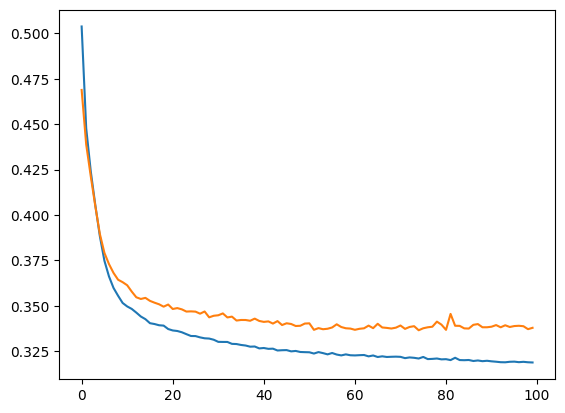

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

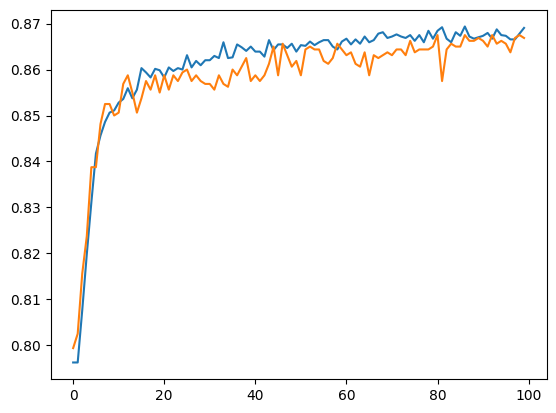

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])